In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Đọc dữ liệu từ tệp commits.csv vào một DataFrame
df = pd.read_csv('commits.csv')

In [ ]:
# Chuyển cột 'Commited Date' thành kiểu dữ liệu datetime
df['Commited Date'] = pd.to_datetime(df['Commited Date'])

In [6]:
# Lọc dữ liệu để chỉ bao gồm từ ngày 1/1/2023 đến 31/12/2023
filtered_df = df[(df['Commited Date'] >= '2023-01-01') & (df['Commited Date'] <= '2023-12-31')]

In [11]:
# Tính toán top 3 người đóng góp nhiều nhất trong từng tháng
monthly_contributions = filtered_df.groupby([filtered_df['Commited Date'].dt.to_period('M'), 'Contributor']).size().unstack().fillna(0)
top3_contributors_each_month = monthly_contributions.apply(lambda s: s.nlargest(3).index.tolist(), axis=1)

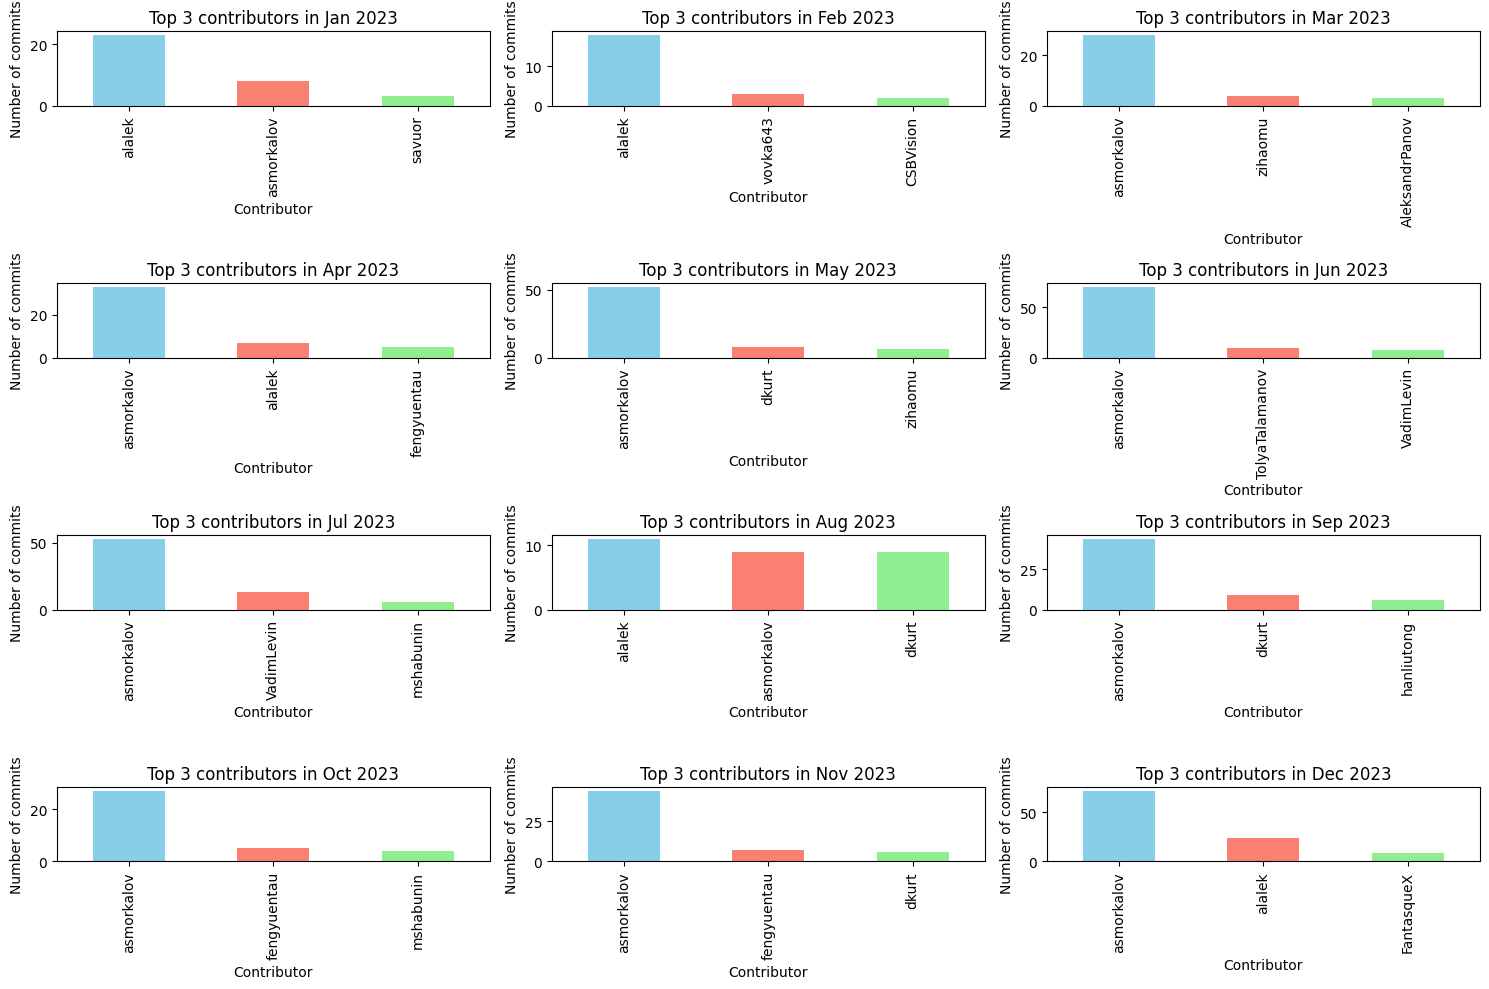

In [14]:
# Vẽ biểu đồ bar chart cho top 3 người đóng góp nhiều nhất trong từng tháng
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
months = top3_contributors_each_month.index.to_timestamp()
for i, (month, top3_contributors) in enumerate(top3_contributors_each_month.items()):
    ax = axes[i // 3, i % 3]
    monthly_data = monthly_contributions.loc[month, top3_contributors]
    monthly_data.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'], ax=ax)
    ax.set_title(f"Top 3 contributors in {month.strftime('%b %Y')}")
    ax.set_xlabel('Contributor')
    ax.set_ylabel('Number of commits')

plt.tight_layout()
plt.show()


In [16]:
# Tính toán tỷ lệ phần trăm đóng góp của top 10 người trong repo suốt 1 năm
yearly_contributions = df.groupby(df['Commited Date'].dt.to_period('Y'))['Contributor'].value_counts().unstack().fillna(0)
top_10_contributors = yearly_contributions.sum().nlargest(10)
total_commits = top_10_contributors.sum()
percentage_contributions = (top_10_contributors / total_commits) * 100


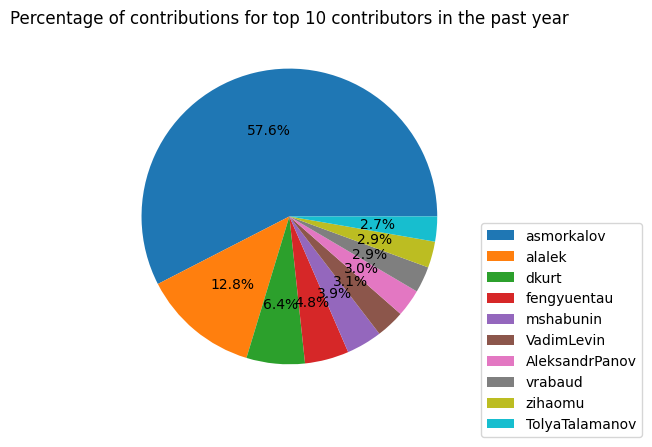

In [17]:
# Vẽ biểu đồ tròn cho tỷ lệ phần trăm đóng góp của top 10 người trong suốt 1 năm
percentage_contributions.plot(kind='pie', autopct='%1.1f%%', labels=None)
plt.title('Percentage of contributions for top 10 contributors in the past year')
plt.legend(labels=percentage_contributions.index, loc="best", bbox_to_anchor=(1, 0.5))
plt.show()


In [22]:
# Tính toán ngày commit đầu tiên và cuối cùng của mỗi người đóng góp
first_commit_dates = df.groupby('Contributor')['Commited Date'].min()
last_commit_dates = df.groupby('Contributor')['Commited Date'].max()

In [23]:
# Tạo DataFrame hiển thị thông tin thời gian làm việc
contributor_work_period = pd.DataFrame({'First Commit': first_commit_dates, 'Last Commit': last_commit_dates})
contributor_work_period['Work Period'] = contributor_work_period['First Commit'].dt.strftime('%d %b %Y') + ' - ' + contributor_work_period['Last Commit'].dt.strftime('%d %b %Y')

In [25]:
# Xuất DataFrame ra file CSV
contributor_work_period.to_csv('contributor_work_period.csv')